In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.stats import proportion
import scipy.stats as st

ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ

Доверительный интервал для баннера A: [0.025301, 0.048699].
Доверительный интервал для баннера B: [0.039115, 0.066885].


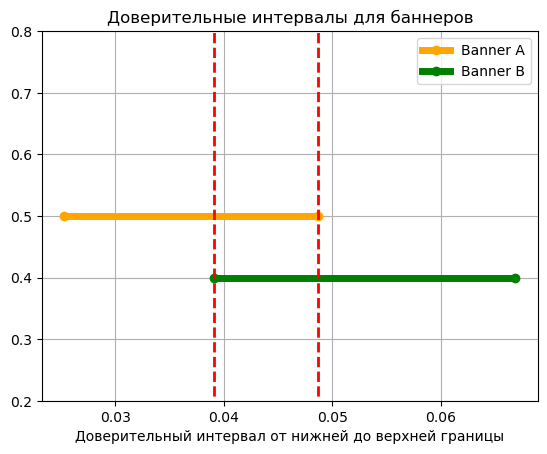

Доверительные интервалы пересекаются.


In [4]:
clicking = pd.read_csv("../click.csv", low_memory=False)

#clicking.describe()

CI_banner_a = proportion.proportion_confint(clicking["banner_a"].sum(), clicking.shape[0])
CI_banner_b = proportion.proportion_confint(clicking["banner_b"].sum(), clicking.shape[0])

print("Доверительный интервал для баннера A: [%f, %f]." % CI_banner_a)
print("Доверительный интервал для баннера B: [%f, %f]." % CI_banner_b)


x1, y1 = [CI_banner_a[0], CI_banner_a[1]], [0.5, 0.5]
x2, y2 = [CI_banner_b[0], CI_banner_b[1]], [0.4, 0.4]

plt.grid(True)
plt.plot(x1, y1, linewidth=5, marker='o', label='Banner A', color='orange')
plt.plot(x2, y2, linewidth=5, marker='o', label='Banner B', color='green')
plt.vlines(CI_banner_a[1], 0, 52, color='red', lw=2, linestyles='dashed')
plt.vlines(CI_banner_b[0], 0, 52, color='red', lw=2, linestyles='dashed')

plt.xlabel("Доверительный интервал от нижней до верхней границы")
plt.legend()
plt.ylim(0.2, 0.8)
plt.title("Доверительные интервалы для баннеров")
plt.show()

if CI_banner_a[0] > CI_banner_b[1] or CI_banner_a[1] < CI_banner_b[0]:
    print("Доверительные интервалы не пересекаются.")
else:
    print("Доверительные интервалы пересекаются.")

In [5]:
def proportions_confint_method(sample1, sample2, alpha = 0.05):
    
    z = st.norm.ppf(1.0 - alpha / 2.0)
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    left = (p1 - p2) - z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right = (p1 - p2) + z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    return [round(left, 5), round(right, 5)]

answer = proportions_confint_method(clicking["banner_a"], clicking["banner_b"])

print(f"95% доверительный интервал для разности двух долей: {answer}.")

95% доверительный интервал для разности двух долей: [-0.03416, 0.00216].


In [6]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b 
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)
  
    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

In [7]:
check_1 = z_stat(clicking["banner_a"], clicking["banner_b"])
check_2 = z_stat(clicking["banner_b"], clicking["banner_a"])

if check_1 > check_2:
    print("Гипотеза H0 подтверждена. Старый баннер был лучше.")
else:
    print("Гипотеза H1 подтверждена. Новый баннер лучше.")

Гипотеза H1 подтверждена. Новый баннер лучше.


КОРРЕЛЯЦИИ ПИРСОНА И СПИРМЕНА

In [8]:
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000)* 0.2

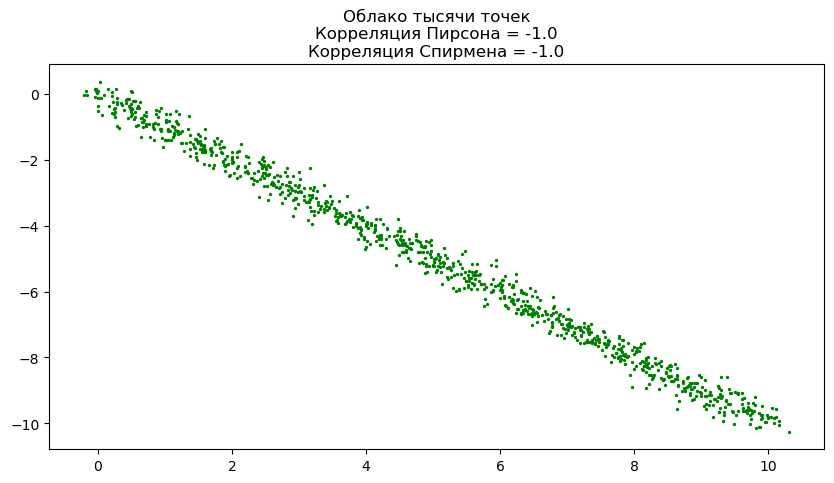

In [9]:
p1, s1 = st.pearsonr(x, y)[0], st.spearmanr(x, y)[0]
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y, s=2, color = 'green')
ax.set_title("Облако тысячи точек\nКорреляция Пирсона = {}\nКорреляция Спирмена = {}".format(round(p1,2),
                                                                                             round(s1,2)))

plt.show()

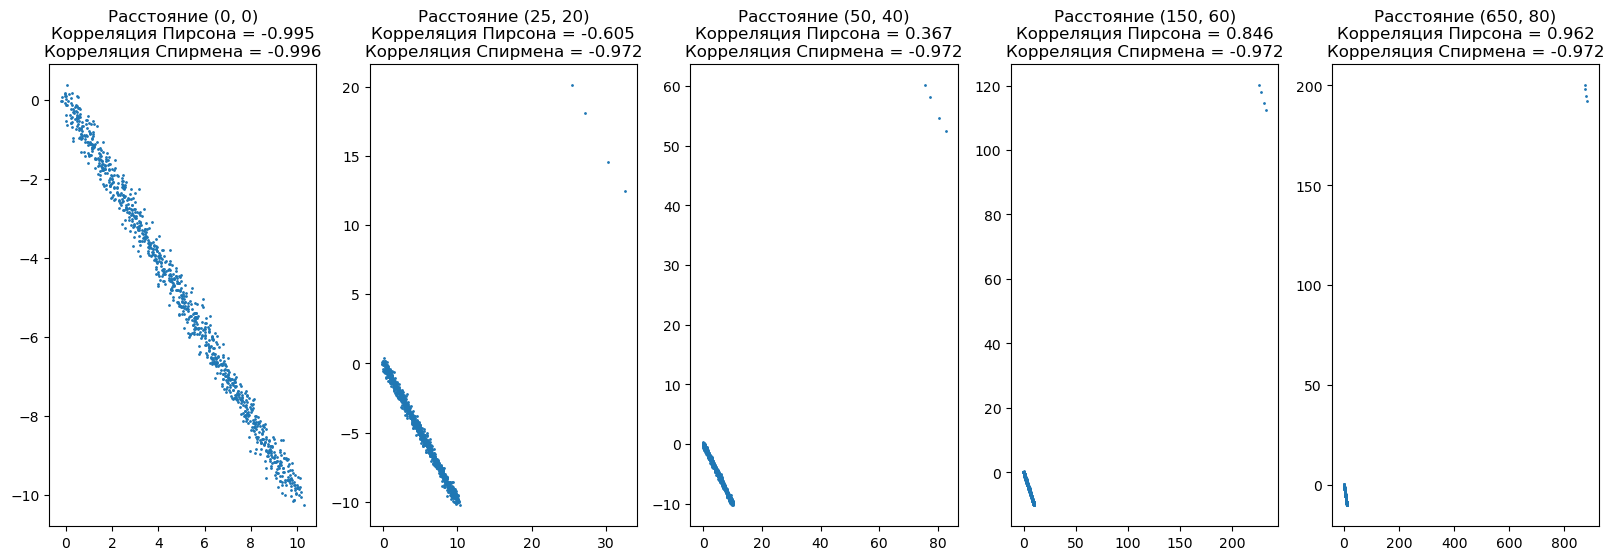

In [10]:
x_delta = [0, 25, 50, 150, 650]
y_delta = [0, 20, 40, 60, 80]

idx = np.random.randint(0, 1000, 4)

fig, ax = plt.subplots(1, len(x_delta), figsize=(20, 6))

for i in range(len(x_delta)):
    x[idx] += x_delta[i]
    y[idx] += y_delta[i]
    ax[i].scatter(x, y, s=1)
    ax[i].title.set_text("Расстояние ({}, {})\nКорреляция Пирсона = {}\nКорреляция Спирмена = {}".format(x_delta[i], y_delta[i], 
                                                                                                         round(st.pearsonr(x, y)[0], 3),
                                                                                                         round(st.spearmanr(x, y)[0], 3)))


plt.show()